> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Appointment Dataset ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> *This dataset contains information about the patients showing for appointment. A brief description of the information provided is given below.

PatientId - Unique Identification for patient
AppointmentID - Unique Identification for appointment
Gender - Sex for Male or Female
ScheduledDay- #Date the appointment was booked
AppointmentDay - #Day of the appointment
Age - Age in years
Neighbourhood- Proximity to the health facility
Scholarship - Sponsorship for free healthcare
Hipertension - If patient is hypertensive or not
Diabetes-  If patient is diabetic or not
Alcoholism -If patient is alcoholic or not
Handcap - If patient is handcap or not
SMS_received - If patient recieved text message or not
No_show - If patient show up for or not

### Question(s) for Analysis
>*What roles does the age,gender and sms_recieved  (Brasilian welfare program) play for us to know in order to predict if a patient will show up for their scheduled appointment?
 

In [2]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.2MB/s eta 0:00:010% |▎                               | 92kB 5.9MB/s eta 0:00:02    30% |█████████▉                      | 3.2MB 20.8MB/s eta 0:00:01    68% |██████████████████████          | 7.2MB 23.0MB/s eta 0:00:01    79% |█████████████████████████▍      | 8.3MB 23.1MB/s eta 0:00:01    89% |████████████████████████████▋   | 9.3MB 20.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  7% |██▌                             | 1.0MB 25.8MB/s eta 0:00:01    25% |████████▎                       | 3.5MB 27.1MB/s eta 0:00:01    44% |██████████████▏                 | 5.9MB 25.9MB/s eta 0:00:01    52% |████████████████▉               | 7.1MB 19.4MB/s eta 0:00:01    61% |███████████████████▋            | 8.2MB 21.5MB/s eta 0:00:01    68% |██████████████████████          | 9.2MB 19.2MB/s eta 0:00:01    84% |███████████████████████████▏    | 11.4MB 23.7MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-te

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

#Inspect the dataset for info and data types

In [4]:
print(df_noshow.describe())
print(df_noshow.info())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

*After looking through the dataset i discovered an outlier in the age column and drop it to allow for consistency

In [5]:
#Drop outliers
df_noshow.drop(df_noshow[df_noshow['Age']<0].index ,inplace=True)
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*Create a data copy of the dataset

In [6]:
df_clean= df_noshow.copy()
print(df_clean.head())
print(df_clean.info())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

#Rename columns and lower case format to allow for consistency.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
df_clean.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#Rename the hipertension column to hypertension

In [7]:
df_clean.rename(columns={"hipertension": "hypertension"}, inplace =True)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


# Populate relevant columns for exploration

In [8]:
df_clean.drop(['appointmentid','neighbourhood','hypertension','alcoholism','handcap'], axis = 1, inplace = True)
df_clean.head()

,patientid,gender,scheduledday,appointmentday,age,scholarship,diabetes,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,0,No
1,5.589980e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,No
2,4.262960e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,No
3,8.679510e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,No
4,8.841190e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,0,No


#To check for columns name 

In [9]:
for column_name in df_clean.columns:
    column = df_clean[column_name]
    count = (column ==0).sum()
    print(column_name,':',count)

patientid : 0
gender : 0
scheduledday : 0
appointmentday : 0
age : 3539
scholarship : 99665
diabetes : 102583
sms_received : 75044
no_show : 0


#Check for unique value

In [10]:
columns = ['no_show','sms_received','gender','scholarship']
def find_unique() :
    '''function check for uniques values in a column'''
    for col in columns:
        print(df_clean[col].unique())
find_unique()

['No' 'Yes']
[0 1]
['F' 'M']
[0 1]


#Check for duplicate rows in the datasets

In [11]:
df_clean.duplicated().sum()

618

#Remove 618 duplicate rows from the dataset

In [12]:
df_clean.drop_duplicates(inplace =True)

#Check if any duplicate is remaining in the datasets

In [13]:
df_clean.duplicated().sum().any()

False

#Plot an histogram for all cloumns 

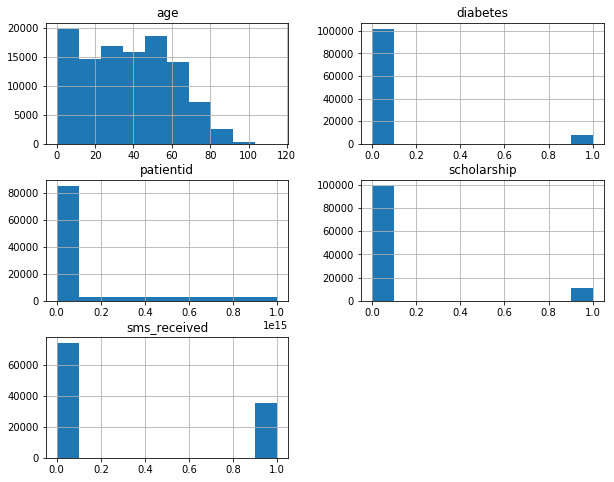

In [14]:
df_clean.hist(figsize=(10,8));

#Check value counts for the patients that attended appointment and not.N0 (Present) and Yes(Absent)

In [17]:
df_clean['no_show'].value_counts()

No     87803
Yes    22105
Name: no_show, dtype: int64

In [20]:
show.scholarship.value_counts()

0    79558
1     8245
Name: scholarship, dtype: int64

#Total counts of patient that show up for appointment 88207 and 22319 didnt showed up.

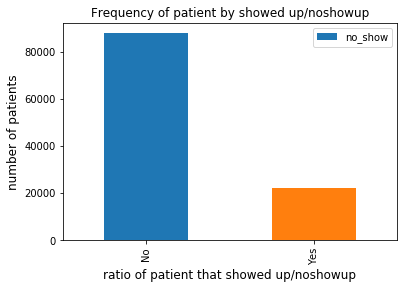

In [18]:
df_clean['no_show'].value_counts().plot(kind='bar');
plt.xlabel('ratio of patient that showed up/noshowup',fontsize=12);
plt.ylabel('number of patients',fontsize=12)
plt.title('Frequency of patient by showed up/noshowup')
plt.legend();

#Create a mask for patient that attended and those that didn't show up

In [19]:
show = df_clean.query('no_show == "No"')
noshowup = df_clean.query('no_show == "Yes"')

#Average age of person that didnt attend appointment

In [21]:
noshowup.age.mean()

34.281339063560281


#Average age of person that attended appointment

In [22]:
show.age.mean()

37.793116408323179

#To discover the ratio of patient that showed up appointment to those that didn't show up based on scholarship

In [23]:
df_clean.loc[:,'no_show']= df_clean.loc[:,'no_show'].apply(lambda x: 0 if x =="No" else 1)
df_clean.groupby('scholarship').mean().loc[:,'no_show']

scholarship
0    0.197243
1    0.236715
Name: no_show, dtype: float64

#The result clearly shows 23% no_show rate compared to 19% show rate for patient with scholarship

Total distribution that recieved sms to thos that didnt recieved

In [24]:
df_clean['sms_received'].value_counts()

0    74426
1    35482
Name: sms_received, dtype: int64

Group patients that show up based on sms received.

In [25]:
df_clean.loc[:,'no_show'] = df_clean.loc[:,'no_show'].apply(lambda x:0 if x =="No" else 1)
df_clean.groupby('sms_received').mean().loc[:,'no_show']

sms_received
0    1.0
1    1.0
Name: no_show, dtype: float64

#The result clearly shows 27% no_show rate compared to 16% show rate for patient that recieved sms.

Sliced age into  age groups

In [27]:
df_clean.loc[:,'Age_cust']= pd.cut(df_clean['age'], bins = [0,13,40,90], labels =['childs','adults','seniors'])
df_clean.groupby('Age_cust').mean().loc[:,'no_show']

Age_cust
childs     1.0
adults     1.0
seniors    1.0
Name: no_show, dtype: float64

This shows that adults which age group range from 13-40 as the highest no show up rate.

In [28]:
df_clean.head()

,patientid,gender,scheduledday,appointmentday,age,scholarship,diabetes,sms_received,no_show,Age_cust
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,0,1,seniors
1,5.589980e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,1,seniors
2,4.262960e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,1,seniors
3,8.679510e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,1,childs
4,8.841190e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,0,1,seniors


#Distribution of gender that attended appointment .
#Plot a barchart for gender that show up for appointment

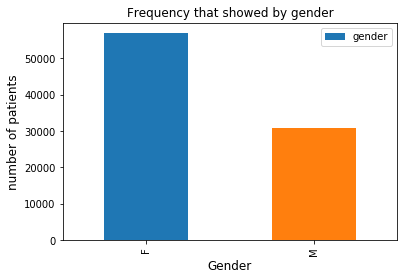

In [29]:
show.gender.value_counts().plot(kind ='bar');
plt.title('Frequency that showed by gender')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('number of patients',fontsize=12);
plt.legend();

This chart shows more showed up for appointment compared to male.

#Distribution of gender that didn't attend appointment .

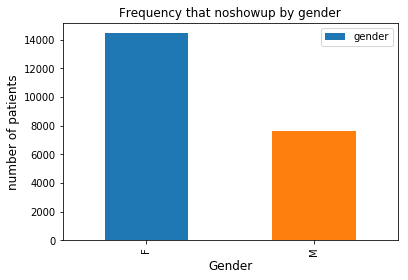

In [30]:
noshowup.gender.value_counts().plot(kind ='bar');
plt.title('Frequency that noshowup by gender')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('number of patients',fontsize=12);
plt.legend();

#Plot a bar chart for patient that attended appointment based on gender

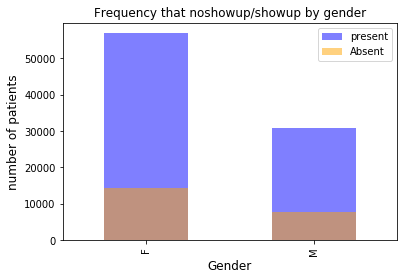

In [31]:
show.gender.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='present')
noshowup.gender.value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Absent')
plt.title('Frequency that noshowup/showup by gender')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('number of patients',fontsize=12)
plt.legend();

# Check unique value counts for the patients that attended appointment and not.N0 (Present) and Yes(Absent)

In [32]:
df_clean['no_show'].value_counts()

1    109908
Name: no_show, dtype: int64

#Average age of patient that showed for appointment and does that didn't show

#To check the rate of patient that receive text to patient that didn't recieved text.

In [33]:
rates = ['text','notext']
for i in [0, 1]:
    rates.append((df_clean[df_clean['sms_received'] == i]['sms_received'].count() / df_clean['sms_received'].count())*100)
    print(rates)

['text', 'notext', 67.71663573170288]
['text', 'notext', 67.71663573170288, 32.28336426829712]


The ratio that get text message is 2:1

### How gender can be use to predict if patient show for appointment.

#Check for how both gender appointment attendance varies based on gender.

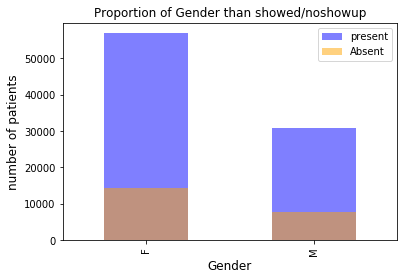

In [34]:
show.gender.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='present')
noshowup.gender.value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Absent')
plt.title('Proportion of Gender than showed/noshowup')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('number of patients',fontsize=12)
plt.legend();

#It shows female showed up for appointment compared to male gender.

# How scholarship can be use to predict if patient show for appointment.
#Check for how appointment attendance varies based on scholarship that recieved text varies 

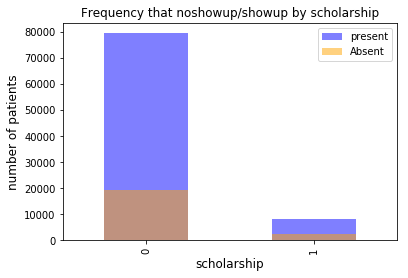

In [38]:
show.scholarship.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='present')
noshowup.scholarship.value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Absent')
plt.title('Frequency that noshowup/showup by scholarship')
plt.xlabel('sms_recieved',fontsize=12)
plt.xlabel('scholarship',fontsize=12)
plt.ylabel('number of patients',fontsize=12)
plt.legend();

### How sms_recieved is a factor in predicting if a patient will attend appointment or not.

#Plot a bar chart showing how sms affect appointment.

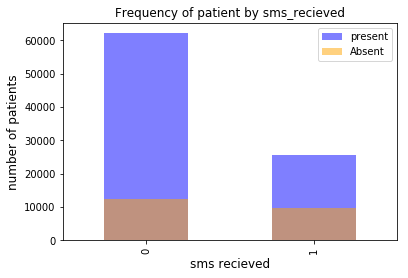

In [39]:
show.sms_received.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='present')
noshowup.sms_received.value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Absent')
plt.xlabel('sms recieved',fontsize=12)
plt.ylabel('number of patients',fontsize=12)
plt.title('Frequency of patient by sms_recieved')
plt.legend();

<a id='conclusions'></a>
## Conclusions

The gender bar chart shows more female patient showing up for scheduled appointment compared to male patient.
Patients that get sms tends to miss showing for scheduled appointment compared to those that recieve any message.
# Limitation
The dataset didn't tell us the promixity of the health facility to the patients resident.
The dataset has lot of duplicate rows which was dropped and consequently affect amount of data available to make inference for the entire population.
Most of the data is categorical types which does not allow a high level of statistical method.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0